In [44]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt


In [45]:
# Load the dataset
data = pd.read_csv("IMDB Dataset.csv")

In [46]:
# Explore the dataset
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [48]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [49]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lower case
    text = re.sub(r"<.*?>", " ", text)  # Remove HTML tags
    text = re.sub(r"http\S+", " ", text)  # Remove URLs
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    return text

In [50]:
# Clean the reviews
data["review"] = data["review"].apply(clean_text)

In [51]:
# Remove stop words
stop_words = set(stopwords.words("english"))
data["review"] = data["review"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [52]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
Feature = vectorizer.fit_transform(data["review"]).toarray()
label = data["sentiment"].apply(lambda feature: 1 if feature == "positive" else 0).values

In [53]:
# Construct a Sequential model
model = Sequential()
model.add(Dense(512, input_dim = 5000, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
# Compile the model
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=["accuracy"])

In [55]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(Feature, label, test_size=0.2)

In [57]:
# Training the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.8189 - loss: 0.3891 - val_accuracy: 0.8850 - val_loss: 0.2751
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.9279 - loss: 0.1857 - val_accuracy: 0.8785 - val_loss: 0.2962
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.9733 - loss: 0.0841 - val_accuracy: 0.8761 - val_loss: 0.4272
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.8760 - val_loss: 0.5870
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 1.0000 - loss: 9.6017e-04 - val_accuracy: 0.8769 - val_loss: 0.7270
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 1.0000 - loss: 1.8715e-04 - val_accuracy: 0.8767 - val_loss: 0.8212
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 1.0000 - loss: 6.3863e-05 - val_accuracy: 0.8773 - val_loss: 0.8766
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 1.0000 - los

In [58]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8700 - loss: 1.0084
Test Accuracy: 0.8727999925613403


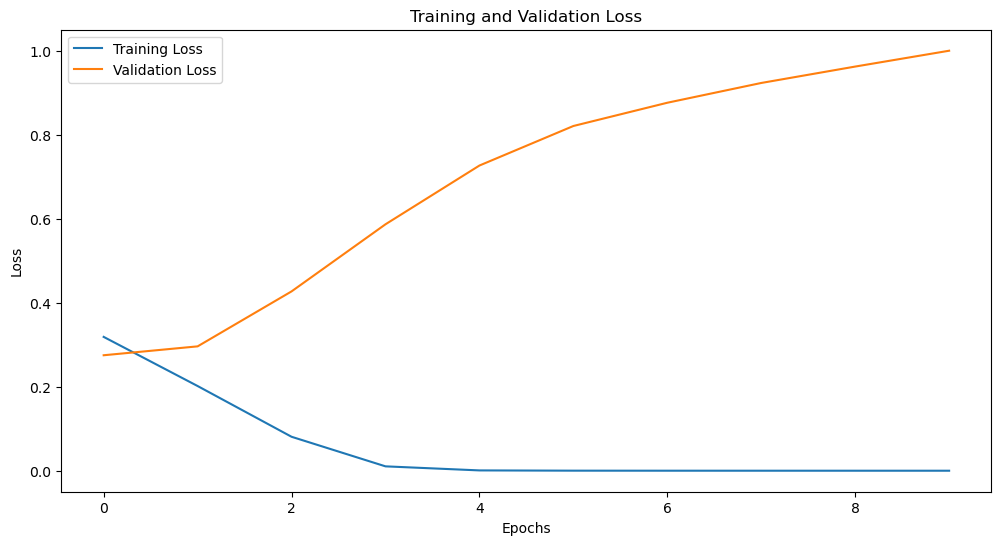

In [59]:
# Plot training and validation loss over epochs
plt.figure(figsize = (12, 6))
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

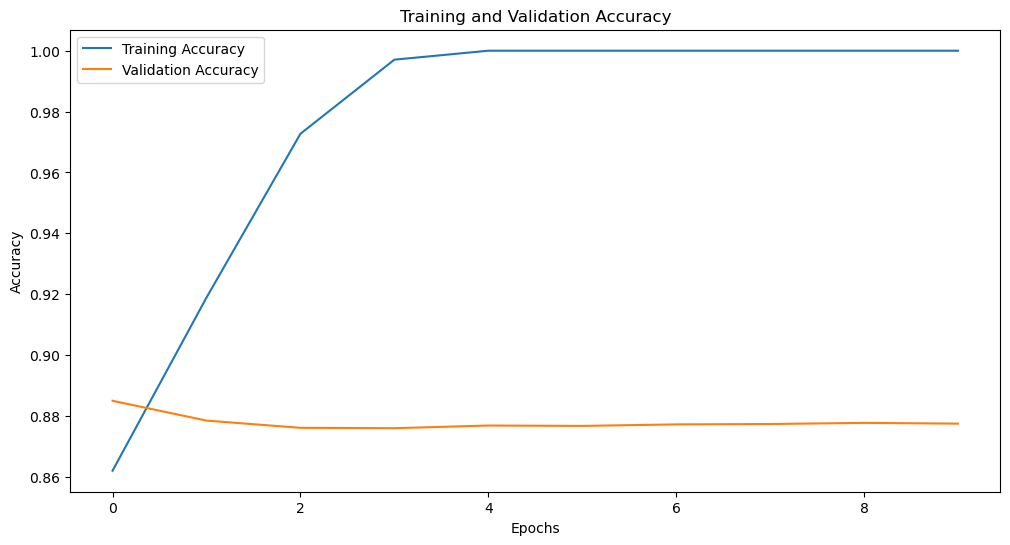

In [60]:
# Plot training and validation accuracy over epochs
plt.figure(figsize = (12, 6))
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()